<a href="https://colab.research.google.com/github/Neuralnomad-hub/CODING-SAMURAI-INTERNSHIP-TASK/blob/main/Vader_(tweets)sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

        textID                                               text
0       textID                                               text
1       textID                                               text
2   cb774db0d1                I`d have responded, if I were going
3   549e992a42      Sooo SAD I will miss you here in San Diego!!!
4   088c60f138                          my boss is bullying me...
5   9642c003ef                     what interview! leave me alone
6   358bd9e861   Sons of ****, why couldn`t they put them on t...
7   28b57f3990  http://www.dothebouncy.com/smf - some shameles...
8   6e0c6d75b1  2am feedings for the baby are fun when he is a...
9   50e14c0bb8                                         Soooo high
10  e050245fbd                                        Both of you
11  fc2cbefa9d   Journey!? Wow... u just became cooler.  hehe....
12  2339a9b08b   as much as i love to be hopeful, i reckon the...
13  16fab9f95b  I really really like the song Love Story by Ta...
14  74a76f

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  0%|          | 0/501 [00:00<?, ?it/s]

       textID    neg    neu  pos  compound  \
0      textID  0.000  1.000  0.0    0.0000   
1      textID  0.000  1.000  0.0    0.0000   
2  cb774db0d1  0.000  1.000  0.0    0.0000   
3  549e992a42  0.474  0.526  0.0   -0.7437   
4  088c60f138  0.494  0.506  0.0   -0.5994   

                                             text     Label  
0                                            text   neutral  
1                                            text   neutral  
2             I`d have responded, if I were going   neutral  
3   Sooo SAD I will miss you here in San Diego!!!  negative  
4                       my boss is bullying me...  negative  


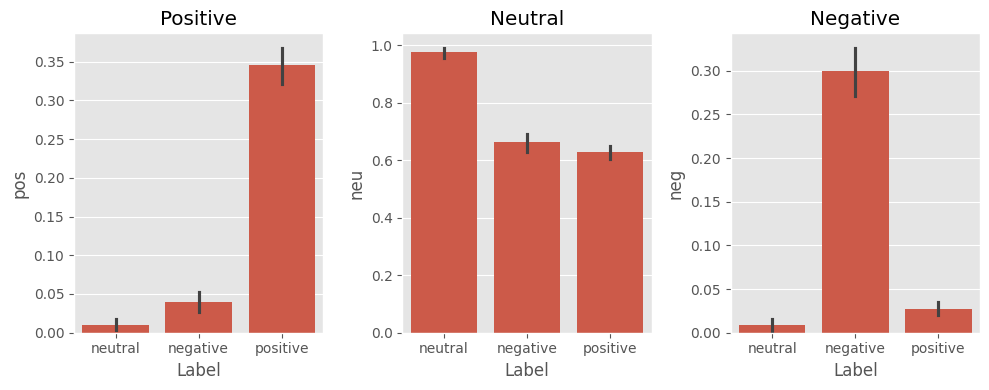

In [6]:
import numpy as np
import seaborn as sns
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

plt.style.use("ggplot")

df = pd.read_csv("twitter_data_500.csv", header=None, names=["textID", "text"])
print(df.head(30))

nltk.download("vader_lexicon")

sia = SentimentIntensityAnalyzer()

results = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["text"]
    myid = row["textID"]
    if isinstance(text, str):
        results[myid] = sia.polarity_scores(text)
    else:
        results[myid] = {"neg": 0, "neu": 0, "pos": 0, "compound": 0}

vader = pd.DataFrame(results).T
vader = vader.reset_index().rename(columns={'index': 'textID'})
vader = vader.merge(df, on='textID', how='left')

vader["Label"] = vader["compound"].apply(
    lambda c: "positive" if c >= 0.05 else ("negative" if c <= -0.05 else "neutral")
)

print(vader.head())

# visualization
fig, axs = plt.subplots(1,3, figsize=(10, 4))
sns.barplot(data=vader, x="Label", y="pos", ax=axs[0])
sns.barplot(data=vader, x="Label", y="neu", ax=axs[1])
sns.barplot(data=vader, x="Label", y="neg", ax=axs[2])

axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")

plt.tight_layout()
plt.show()